<a href="https://colab.research.google.com/github/leerachel20/Exploratory-Data-Analysis-with-DSEA/blob/main/Intro_to_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Building A Simple Neural Network with Keras**

In this brief tutorial, we are going to train a simple neural network with keras to predict the onset of diabetes.

The data comes from a very popular standard machine learning dataset Pima Indians onset of diabetes in UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

You can read the dataset descriptions here: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names

In [1]:
import numpy as np

In [2]:
dataset = np.loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')

To simplify the process, we are not going to worry about the meaning of the variables. Just split them into Xs (i.e., the first nine columns) and Ys (i.e., the last column). This is a dataset of 9 columns and 768 rows

In [3]:
X = dataset[: ,0:8]
y = dataset[:,8]

Next we are going to create a simple fully-connected neural network. Recall the parameters and the hyperparameters we need to decide on:

1. Main parameters (in the pre-activation functions): weights and biases: We don't really need to worry about these right now. ANN will learn these as long as 3 and 4 are set.
2. Choice of activation function: sigmoid, tanh, relu, leaky relu are all common choices.
3. Number of hidden layers: Let's say two hidden layers and an output layer
4. Number of hidden units: Let's say 12 and 8.
5. Learning rate: The default learning rate is 0.001
6. Number of iterations: Let's try 150 to start with.

Before we do anything, let's import Keras. You migh need to install it if you have not done so: conda install -c conda-forge keras

You will need Sequential, a class allow you to build a linear stack of layers and Dense to build fully connected nodes.

In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [5]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# compile the keras model
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

Once we have created our model, you can start to train the data with Xs and the labels.

In [6]:
# You can turn on the verbose in case you want to see all the details
history = model.fit(X, y, epochs=150, verbose=0)
# Print out the result from the final iteration and accuracy.
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.7565
Accuracy: 75.65


Let's print out two things (a) the history of the accuracy per epoch (we hope it is going to increase over time), and (b) the history of the loss per epoch (we hope it will drop over time).

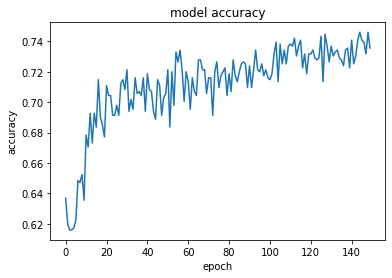

In [7]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

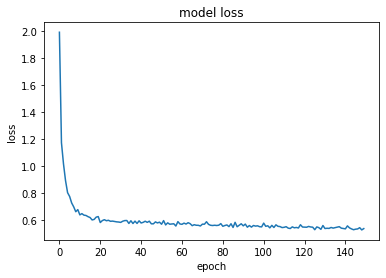

In [8]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Voila! You just built an neural network that has about 70% of accuracy with only about 20 lines of code.